In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]
import random
import sys
import seaborn as sns
import pandas as pd
import prelim_fig_funcs

# make sure you have "binAges_HUMAN.csv" from the google drive
# then run "preprocess/convert_multiple_gene_age_data_into_dict.py"
# then make sure you have "data/function_to_genes_all_in_simplified.p" from the google drive
# then run "save_function_to_age_pickle.py with the data from multiple datasets setting
# to get the pickle files we'll be using 

dataset_to_gene_to_age_dict = pickle.load(open("data/dataset_to_gene_to_age_dict.p","rb"))  
dataset_list = dataset_to_gene_to_age_dict.keys()
print dataset_list

['PANTHER8_all', 'EggNOG', 'InParanoidCore', 'Hieranoid_2', 'RSD', 'OMA_Groups', 'Orthoinspector', 'OMA_Pairs', 'PhylomeDB', 'Metaphors', 'InParanoid', 'PANTHER8_LDO', 'EnsemblCompara_v2']


In [2]:
# FUNCTION GROUPED
functions_dict = {}
means_dict = {}
stds_dict = {}
lens_dict = {}
ages_dict = {}

for dataset in dataset_list:
    ages_list = []
    for gene in dataset_to_gene_to_age_dict[dataset]:
        ages_list.append(dataset_to_gene_to_age_dict[dataset][gene])
    ages_list = np.array(ages_list)
    ages_dict[dataset] = ages_list[ages_list != np.array(None)]
    
for dataset in dataset_list:
    function_to_age_dict = pickle.load(open("data/function_to_age_%s_dict.p"%dataset,"rb"))
    function_list, mean_list, std_list, len_list = prelim_fig_funcs.get_function_grouped_age_data(function_to_age_dict)
    functions_dict[dataset] = function_list
    means_dict[dataset] = mean_list
    stds_dict[dataset] = std_list
    lens_dict[dataset] = len_list
    
# RANDOM
# am doing this seperately for each dataset, even though each should be super similar
# and would be faster to do for just one dataset and use it overall
rand_means_dict = {}
rand_stds_dict = {}
for dataset in dataset_list:
    rand_means_list, rand_stds_list = prelim_fig_funcs.get_random_grouped_age_data(lens_dict[dataset],ages_dict[dataset])
    rand_means_dict[dataset] = rand_means_list
    rand_stds_dict[dataset] = rand_stds_list
    


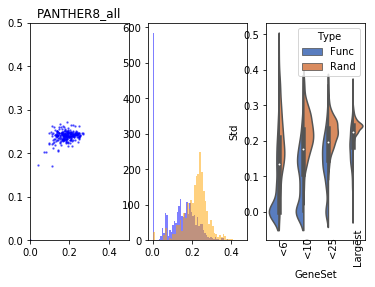

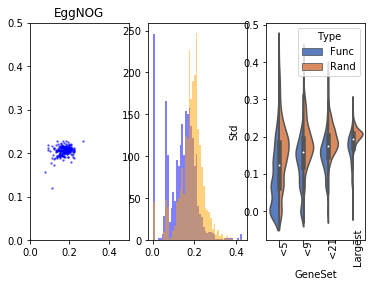

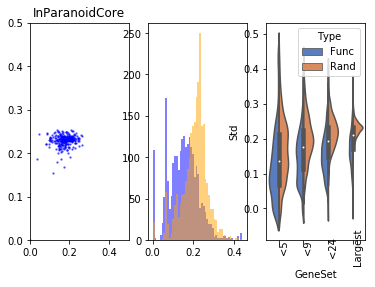

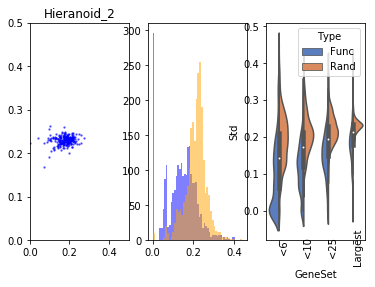

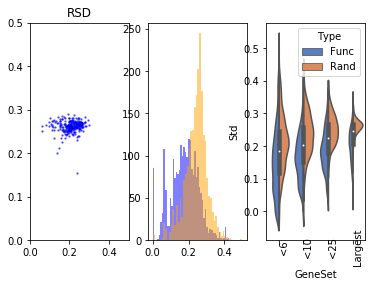

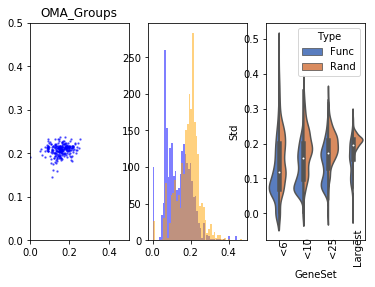

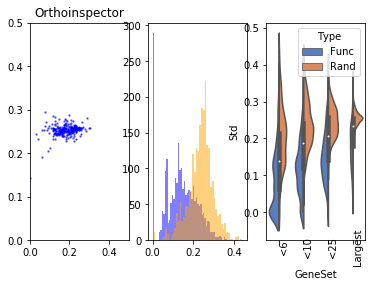

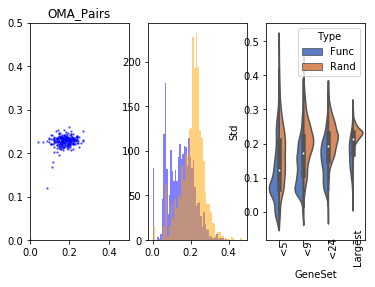

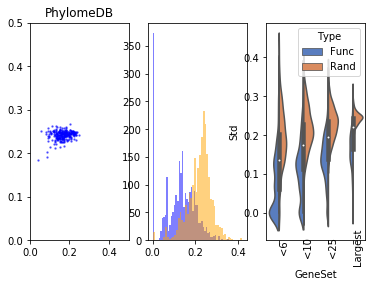

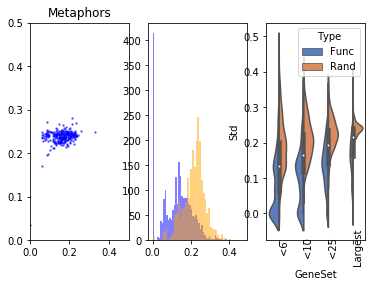

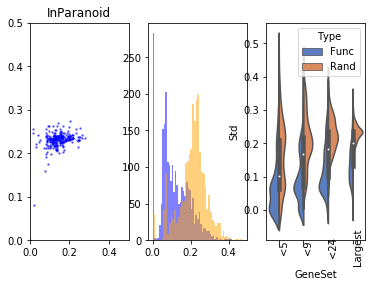

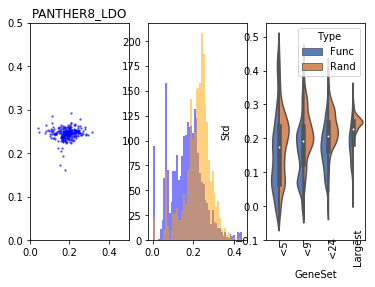

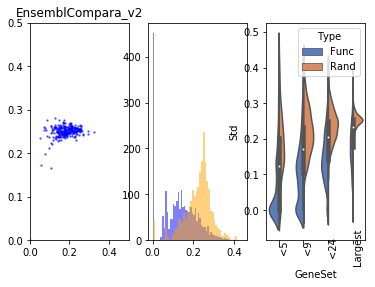

In [12]:

rows = len(dataset_list)
for i in xrange(0,rows):
    ax_lists = [None,None,None]
    fig, ax_lists = plt.subplots(1, 3 , sharex=False, sharey=False)
    
    dataset = dataset_list[i]
    ax_lists[0].set_title(dataset)
    prelim_fig_funcs.figure1(ax_lists[0],lens_dict[dataset],stds_dict[dataset], rand_stds_dict[dataset])
    prelim_fig_funcs.figure2(ax_lists[1],stds_dict[dataset], rand_stds_dict[dataset])
    prelim_fig_funcs.figure4(ax_lists[2],lens_dict[dataset],stds_dict[dataset], rand_stds_dict[dataset])
    plt.savefig("figures/different_datasets_figures_table_%s.png"%dataset,dpi=600)
    